In [1]:
# LOADING NECESSARY LIBRARIES

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set_style('whitegrid')
import datetime  as dt
import time  
import pdpipe as pdp #allowing a linear series of data transforms to be linked together, resulting in a measurable modeling process
from typing import Tuple, List, Dict 
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import glob 
import plotly.graph_objects as go 
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.offline
import category_encoders as ce

%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')




from plotly import tools

import plotly.offline as pyoff #not sure wat this does 
import plotly.graph_objs as go #this tooo lol 

from plotly.offline import init_notebook_mode, iplot

import plotly.figure_factory as ff
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
import requests
import zipfile
import io
import os
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

%matplotlib inline

In [3]:
read_file = pd.read_excel ("hipy.xlsx")

In [4]:
read_file.to_csv ("hipy.csv", 
                  index = None,
                  header=True)

In [5]:
data = pd.DataFrame(pd.read_csv("hipy.csv"))

data

,student_ID,Problem_ID,Time_problem,Original,Correct,Methods_used,Time_method,Date,Attempt_count
0,2425844,q1,7.0,1,0,none,0.0,2021-12-05,2
1,2425844,q1.1,1.0,0,1,none,0.0,2021-12-05,1
2,2425844,q2,7.0,0,0,none,0.0,2021-12-05,1
3,2425844,q2.1,4.0,0,1,none,0.0,2021-12-05,1
4,2425844,q3,10.0,1,1,none,0.0,2021-12-05,1
...,...,...,...,...,...,...,...,...,...
222,2443532,q2,35.0,1,0,none,0.0,2021-12-01,2
223,2443532,q2.1,5.0,0,1,none,0.0,2021-12-01,1
224,2443532,q3,17.0,1,1,none,0.0,2021-12-01,1
225,2443532,q4,12.0,1,1,none,0.0,2021-12-01,1


In [6]:
data.describe()

,student_ID,Time_problem,Original,Correct,Time_method,Attempt_count
count,2.270000e+02,227.000000,227.000000,227.000000,227.000000,227.000000
mean,2.343436e+06,48.117753,0.343612,0.581498,0.781938,1.264317
std,2.274530e+05,425.834098,0.475963,0.494404,1.610881,0.638517
min,1.603806e+06,0.300000,0.000000,0.000000,0.000000,1.000000
25%,2.246349e+06,2.000000,0.000000,0.000000,0.000000,1.000000
50%,2.443377e+06,5.000000,0.000000,1.000000,0.000000,1.000000
75%,2.483688e+06,11.000000,1.000000,1.000000,1.000000,1.000000
max,2.489211e+06,4976.000000,1.000000,1.000000,9.000000,4.000000


In [7]:
#check missing data
data.isnull().sum()

student_ID       0
Problem_ID       0
Time_problem     0
Original         0
Correct          0
Methods_used     0
Time_method      0
Date             0
Attempt_count    0
dtype: int64

# data cleaning

In [8]:
data_clean = data.copy()

In [9]:
data_clean.drop(['Problem_ID','Methods_used','Date'], axis=1, inplace=True)

In [10]:
#display cleaned data
data_clean.head()

,student_ID,Time_problem,Original,Correct,Time_method,Attempt_count
0,2425844,7.0,1,0,0.0,2
1,2425844,1.0,0,1,0.0,1
2,2425844,7.0,0,0,0.0,1
3,2425844,4.0,0,1,0.0,1
4,2425844,10.0,1,1,0.0,1


# Classification

In [11]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score

In [12]:
data_clean.iloc[:, 1:43].head()

,Time_problem,Original,Correct,Time_method,Attempt_count
0,7.0,1,0,0.0,2
1,1.0,0,1,0.0,1
2,7.0,0,0,0.0,1
3,4.0,0,1,0.0,1
4,10.0,1,1,0.0,1


Split dataset into training set and test set: 70% training and 30% test


In [ ]:
import numpy

my_array = []
a = int(input("Size of array:"))
for i in range(a):
    my_array.append(float(input("Element:")))
my_array = numpy.array(my_array)
print(numpy.floor(my_array))

In [ ]:
X = preprocessing.scale(data.iloc[:, 1:43].values)
X_features = data.iloc[:, 1:43].columns
y = data.iloc[:, 7].values


# Split dataset into training set and test set
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [ ]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

In [ ]:
y_test

# K Nearest Neighbors
Building model¶


Start KNN classifier with 1 neighbor:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# start trying with neighbors = 1
knn = KNeighborsClassifier(n_neighbors=1)

fit the model

In [ ]:
knn.fit(X_train, y_train)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
np.mean(y_pred == y_test)

Try with 3 neighbor

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
np.mean(y_pred == y_test)

Try with 5 neighbors:

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
np.mean(y_pred == y_test)

Try with 1 to 15 neighbors:

In [ ]:
train_acc = []
test_acc = []
neighbors_set = range(1, 16)

for n_neighbors in neighbors_set:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    train_acc.append(clf.score(X_train, y_train))
    test_acc.append(clf.score(X_test, y_test))

plt.plot(neighbors_set, train_acc, label="training accuracy")
plt.plot(neighbors_set, test_acc, label="test accuracy")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.legend();

In [ ]:
max(test_acc)

To be concise, the cross-validation method we used here is the k-fold cross-validation, with k = 5 for all models. The training set is split into 5 smaller sets, and the model is trained using 4 of the 5 folds as training data, after that, the resulting model is validated on the remaining part of the data.

In [ ]:
knn_param_grid = dict(n_neighbors=range(1, 16))
knn = KNeighborsClassifier()

Grid search with cross validation for best number of neighbors:

In [ ]:
knn_param_grid = dict(n_neighbors=range(1, 16))
knn = KNeighborsClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
knn_grid = GridSearchCV(knn, knn_param_grid, cv=5, verbose=0, iid=True)   

In [ ]:
knn_grid.fit(X_train, y_train)

In [ ]:
knn_grid.best_params_

In [ ]:
knn_grid.best_estimator_

# Model evaluation

In [ ]:
y_pred = knn_grid.predict(X_test)

In [ ]:
def print_clf_report(model_name):
    print('Confusion matrix of {}:'.format(model_name))
    print();
    print(confusion_matrix(y_test, y_pred))
    print();
    print('Classification report of {}:'.format(model_name))
    print();
    print(classification_report(y_test, y_pred, target_names=['0: Fail', '1: Pass']))

In [ ]:
print_clf_report('KNN')

In the classification report, 0 stands for failed in final exam while 1 stands for passed final exam.


**Cross validation result:**

In [ ]:
def print_cv_result(model_name):
    print(); print("Cross validation result of {}:".format(model_name))
    print(); print("Cross validation scores: {}".format(CV_result))
    print(); print("Mean of cross validation scores: {}".format(CV_result.mean()))
    print(); print("Standard deviation of cross validation scores: %0.2f" % CV_result.std())
    print(); print("Coefficient of Variation in CV result: %0.2f" % (CV_result.std()/CV_result.mean()))

In [ ]:
CV_result = cross_val_score(knn_grid.best_estimator_, X_train, y_train, cv=5)

In [ ]:
print_cv_result(model_name='KNN')

In [ ]:
y_scores = knn_grid.predict_proba(X_test)

In [ ]:
plot_roc('k nearest neighbors')

# MODEL 2   LOGISTIC REGRESSION

**Building the model:**

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=1115, solver='lbfgs')

In [ ]:
logreg.fit(X_train, y_train)

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
print_clf_report('Logistic regression')

**Try with different C values:**

In [ ]:
C = np.logspace(0, 3, 10)

logr_param_grid = dict(C=C)
logr_grid = GridSearchCV(LogisticRegression(random_state=1115, solver='lbfgs'), logr_param_grid, 
                    cv=5, iid=False, verbose=0)

In [ ]:
logr_grid.best_params_

**Model evaluation**

In [ ]:
y_pred = logr_grid.predict(X_test)

In [ ]:
print_clf_report('Logistic regression')

In [ ]:
CV_result = cross_val_score(logr_grid.best_estimator_, X_train, y_train, cv=5)

In [ ]:
print_cv_result('Logsitic regression')

# MODEL3:XG BOOST

**Building model**

Start with default setting:

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(random_state=1115)

In [ ]:
xgb.fit(X_train, y_train)

In [ ]:
y_pred = xgb.predict(X_test)

In [ ]:
print_clf_report('XGBoost')

Try with a smaller learning rate:

In [ ]:
xgb = XGBClassifier(learning_rate=0.01, random_state=1115

In [ ]:
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

print_clf_report('XGBoost')

Grid Search for best-generalized parameters:

In [ ]:
xgb_param_grid = {'learning_rate': [1, 0.1, 0.01, 0.001, 0.0001], 
                  'n_estimators': [50, 100, 200, 300]}
xgb = XGBClassifier(random_state=1115)

Grid search with k-fold cross validation:


In [ ]:
xgb_grid = GridSearchCV(xgb, xgb_param_grid, cv=5, verbose=0, iid=True

In [ ]:
xgb_grid.fit(X_train, y_train)

In [ ]:
xgb_grid.best_params_

**Model Evaluation**

In [ ]:
y_pred = xgb_grid.predict(X_test)


In [ ]:
print_clf_report('XGBoost')

In [ ]:
CV = cross_val_score(xgb_grid.best_estimator_, X_train, y_train, cv=5)




In [ ]:

print_cv_result('XGBoost')

**Model Selection**

There are total 3 models used in classification: K nearest neighbors, logistic regression. We chose knn as the baseline model because it is easy to deploy and always has a good performance for high-dimensional data.


# CLUSTERING ALL MODELS

We use K-means clustering method to cluster the students based on their behavior data:

In [ ]:
from sklearn.cluster import KMeans

**the slope of distortion did not decrease a lot,**

**this means the data cannot be clustered well**

In [ ]:
# calculate distortion for a range of number of student who fall under hitting a wall
distortions = []
for i in range(1, 16):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot


plt.figure(figsize=(8,4.5))
plt.plot(range(1, 16), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Distortion plot for 1 to 15 clusters')
plt.show()

In [ ]:
#ARRAY OF ALIST OF THE STUDENTS ,

km = KMeans(n_clusters=6, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=1115)
y_km = km.fit_predict(X)
y_km

In [ ]:
class sklearn.model_selection.GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, iid='deprecated', refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)

In [ ]:
pip install scikit-learn==0.18 --force-reinstall

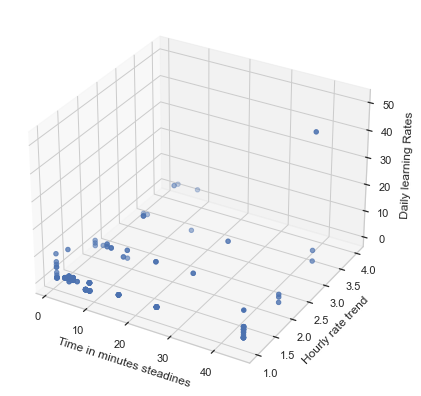

In [28]:
# create figure and 3d axes
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111, projection='3d')

# set axis labels
ax.set_zlabel('Daily learning Rates')
ax.set_xlabel('Time in minutes steadines')
ax.set_ylabel('Hourly rate trend')

# scatter plot with response variable and 2 predictors
ax.scatter(data['cramming'], data['erratic'], data['normal'] )

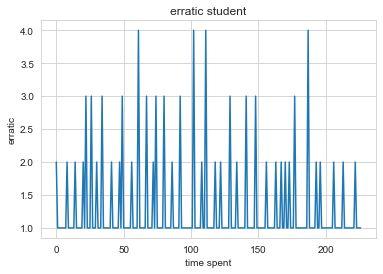

In [ ]:


fig, (axis1, axis2)  = plt.subplots(1, 2,figsize=(10,5))
sns.regplot(x='Attempt_count', y='Time_problem', data=data, ax=axis1)
sns.regplot(x='Correct', y='Time_problem', data=data, ax=axis2)



 students were more vigilant towards the approach the approach of due dates, perhaps that last minute need to boost your final grade.

In [26]:
plot = sns.countplot(x='HOURMIN', hue='learntITEMS', data=data, order=['Pass', 'Fail'], palette='Set1')
plot.set(xlabel='HOURMIN', ylabel='correct', title='Time spent per question comparison')
plt.show()

ValueError: Could not interpret input 'HOURMIN'

In [ ]:
data['class'].value_counts()

In [ ]:


print('Percentage',data.class.value_counts(normalize=True))
data.class.value_counts(normalize=True).plot(kind='bar')



In [196]:
print('Percentage',data.class.value_counts(normalize=True))
data.class.value_counts(normalize=True).plot(kind='bar')

SyntaxError: invalid syntax (4256829385.py, line 1)

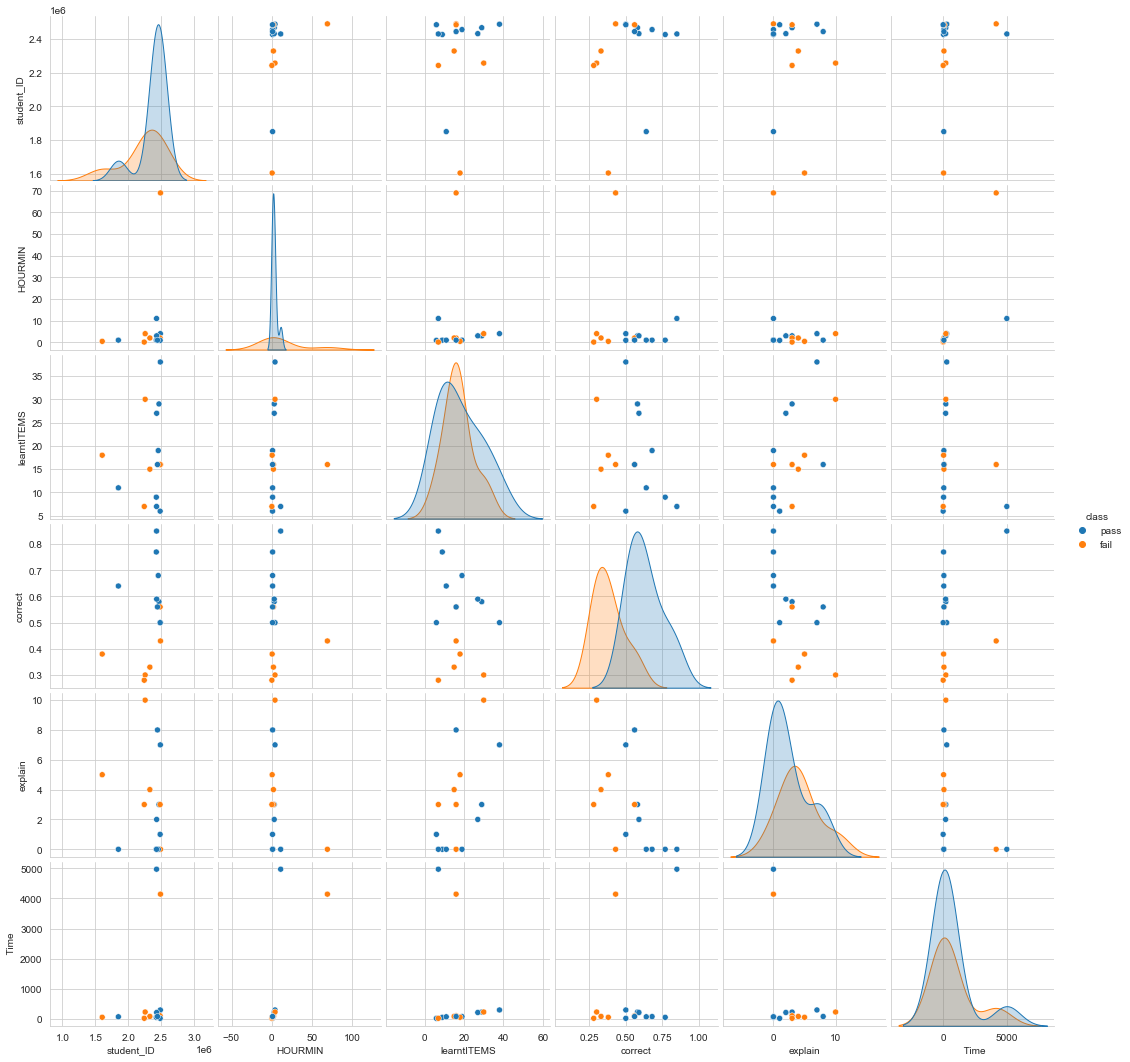

In [198]:
sns.pairplot(data,hue='class')

In [63]:
x = data['Time_problem']
y = data['Correct']



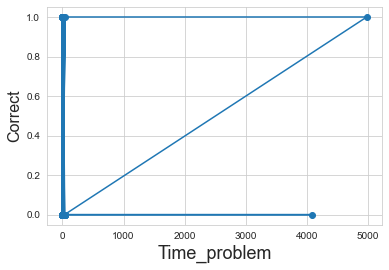

In [64]:
 #Line Graph
 plt.xlabel('Time_problem', fontsize=18)
plt.ylabel('Correct', fontsize=16)
plt.scatter(x, y)
 plt.plot(x, y)

In [65]:
plt.show()

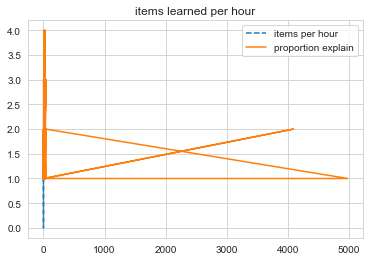

In [75]:
plt.plot(data.Correct,data.Original ,'--',label='items per hour')
plt.plot(data['Time_problem'], data.Attempt_count    , label='proportion explain')

#tittle of the graph
plt.title('items learned per hour')

plt.legend()

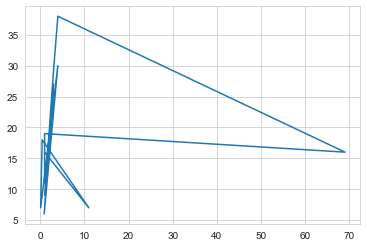

In [115]:
plt.plot(data['HOURMIN'], data.learntITEMS)
plt.show()

# MODELS

classification

In [29]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [30]:
data.iloc[:, 1:43].head()

,Time_problem,erratic,normal,cramming,hitting a wall
0,7.0,2,3,1,35
1,1.0,1,2,1,35
2,7.0,1,1,1,35
3,4.0,1,5,1,35
4,10.0,1,5,1,35


Split dataset into training set and test set: 70% training and 30% test


In [33]:
data = data
# separate into input and output columns
X = data[:, :-1].astype(str)
y = data[:, -1].astype(str)
# one hot encode input variables
onehot_encoder = OneHotEncoder(sparse=False)
X = onehot_encoder.fit_transform(X)
# ordinal encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
# summarize the transformed data
print('Input', X.shape)
print(X[:5, :])

Input (227, 93)
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [34]:
data = data
# separate into input and output columns
X = data[:, :-1].astype(str)
y = data[:, -1].astype(str)
# one hot encode input variables
onehot_encoder = OneHotEncoder(sparse=False)
X = onehot_encoder.fit_transform(X)
# ordinal encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
# summarize the transformed data
print('Input', X.shape)
print(X[:5, :])

Input (227, 93)
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [41]:
X = preprocessing.scale(data.iloc[:, 1:43].values)
X_features = data.iloc[:, 1:43].columns
y = data.iloc[:, 48].values


# Split dataset into training set and test set
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40) 

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [88]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

NameError: name 'X_train' is not defined

# logistic regression model

In [120]:
Logit_Model = LogisticRegression()
Logit_Model.fit(X_train,y_train)

ValueError: could not convert string to float: 'fail'